In [1]:
from __future__ import print_function
!pip install numpy==1.16.1
import numpy as np
import nltk

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

import matplotlib.pyplot as plt

nltk.download('punkt')

     |████████████████████████████████| 17.3MB 2.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# restore np.load for future normal usage
np.load = np_load_old

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')



Loading data...
17465344/17464789 [==============================] - 16s 1us/step
25000 train sequences
25000 test sequences


Pad sequences (samples x time)


W0819 15:29:13.094166 140267723872128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 15:29:13.133581 140267723872128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 15:29:13.142095 140267723872128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



x_train shape: (25000, 100)
x_test shape: (25000, 100)
Build model...


W0819 15:29:13.334661 140267723872128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 15:29:13.362426 140267723872128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0819 15:29:13.370792 140267723872128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               98560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________
None
Train...


W0819 15:29:13.777243 140267723872128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 54s 2ms/step - loss: 0.6735 - acc: 0.5625 - val_loss: 0.6445 - val_acc: 0.6123
Epoch 2/15
25000/25000 [==============================] - 50s 2ms/step - loss: 0.5769 - acc: 0.6943 - val_loss: 0.5968 - val_acc: 0.6762
Epoch 3/15
25000/25000 [==============================] - 50s 2ms/step - loss: 0.4742 - acc: 0.7728 - val_loss: 0.6058 - val_acc: 0.7072
Epoch 4/15
25000/25000 [==============================] - 50s 2ms/step - loss: 0.3997 - acc: 0.8193 - val_loss: 0.6720 - val_acc: 0.7060
Epoch 5/15
25000/25000 [==============================] - 50s 2ms/step - loss: 0.3803 - acc: 0.8302 - val_loss: 0.6971 - val_acc: 0.6854
Epoch 6/15
25000/25000 [==============================] - 50s 2ms/step - loss: 0.3561 - acc: 0.8444 - val_loss: 0.6847 - val_acc: 0.6853
Epoch 7/15
25000/25000 [==============================] - 50s 2ms/step - loss: 0.2940 - acc: 0.8786 - val_loss: 0.7396 - val_acc

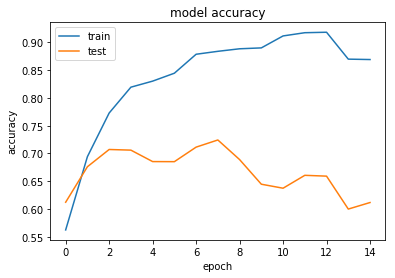

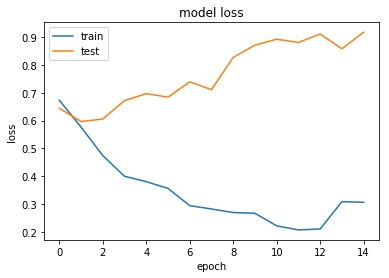

In [3]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(256, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15, 
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
from nltk import word_tokenize
from keras.preprocessing import sequence
word2index = imdb.get_word_index()
test=[]
for word in word_tokenize( "good movie"):
     test.append(word2index[word])

test=sequence.pad_sequences([test],maxlen=100)
model.predict(test)

1646592/1641221 [==============================] - 4s 2us/step


array([[0.34895498]], dtype=float32)